In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the file
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [69]:
# Take values of x and y
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

# Take mean of x and y
mean_x=np.mean(x)
mean_y=np.mean(y)

# Take length of 
n=len(x)

In [70]:
num=0
den=0

# Value of m
for i in range(n):
    num=num+((x[i]-mean_x)*(y[i]-mean_y))
    den=den+((x[i]-mean_x)*(x[i]-mean_x))

In [71]:
m=num/den
print(m)

0.26342933948939945


In [72]:
c=mean_y - (m*mean_x)
print(c)

325.57342104944223


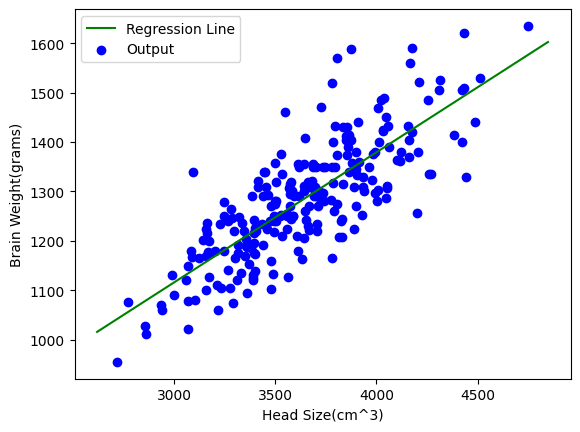

In [73]:
max_x=np.max(x)+100
min_x=np.min(x)-100

# Find the value of x ad y
X=np.linspace(min_x,max_x,1000)
Y=m*X + c

# Plotting the regression line
plt.plot(X,Y,color='green',label='Regression Line')
plt.scatter(x,y,color='blue',label='Output')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [74]:
# 16 Jan

# Find R^2

ssr=0
ssm=0
for i in range(n):
    ypre=m*x[i]+c
    ssr+=(y[i]-ypre)*(y[i]-ypre)
    ymean=np.mean(y)
    ssm+=(y[i]-ymean)*(y[i]-ymean)
Rr2=1-ssr/ssm
print(Rr2)


0.6393117199570003


In [75]:
from sklearn.linear_model import LinearRegression

x = data['Head Size(cm^3)'].values.reshape(-1, 1)

reg=LinearRegression()

reg=reg.fit(x,y)

y_pred=reg.predict(x)

r2_score=reg.score(x,y)

print(r2_score)


0.639311719957


In [76]:
# 21 Jan

# take the initial weights to zero


X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

# Normalize the range of X
X=(X-np.mean(X))/np.std(X)


w=0 # initial slope
b=0 # y-intercept
alpha=0.001 # Learning rate
iten_n=3000 # Number of iterations
n=len(X)
for i in range(iten_n+1):
    # Predict the value of y
    y_pred= w * X + b
    
    # Find the gradient
    dw = -(2/n) * np.sum(X*(Y-y_pred))
    db = -(2/n) * np.sum(Y-y_pred)

    # Update the parameters
    w = w - alpha*dw
    b = b - alpha*db

    if(i%100==0):
        cost= np.mean((Y-y_pred)**2)
        # print(i,": Value of cost:",cost,"Value of m:",w,"Value of c:",b)
        print(i,"cost:",cost,"m:",w,"c:",b,end="")
        # print r2 value
        ssr=0
        ssm=0
        for j in range(n):
            ypre=w*X[j]+b
            ssr+=(Y[j]-ypre)**2
            ymean=np.mean(Y)
            ssm+=(Y[j]-ymean)**2
            Rr2=1-ssr/ssm
        # print("Value of r2:",Rr2)
        print(" r2:",Rr2)
print("value of m and c:",w,",",b)

0 cost: 1660184.9240506329 m: 0.1920347273400281 c: 2.565746835443038 r2: -113.66638430553871
100 cost: 1114125.7757297005 m: 17.57793034919184 c: 234.8560585462205 r2: -75.95140436135141
200 cost: 748237.9622009587 m: 31.809447375017577 c: 425.00119676339045 r2: -50.68042118765916
300 cost: 503074.2422990213 m: 43.458894792716706 c: 580.647694980859 r2: -33.747558131385205
400 cost: 338801.8961487605 m: 52.99474574180852 c: 708.0547516876754 r2: -22.40166591532731
500 cost: 228730.9455182804 m: 60.80047678319172 c: 812.3459389909312 r2: -14.799332526662322
600 cost: 154977.72742267128 m: 67.18998909999402 c: 897.7152429389192 r2: -9.705376771414445
700 cost: 105559.2646193507 m: 72.42023178067627 c: 967.595721290099 r2: -6.292163497301533
800 cost: 72446.34386954318 m: 76.70153481954738 c: 1024.7975611641232 r2: -4.005134434950813
900 cost: 50258.97788556161 m: 80.20606736797893 c: 1071.621088452103 r2: -2.4727069210573904
1000 cost: 35392.29750340327 m: 83.07476137807512 c: 1109.9492

In [77]:
# Find R^2
ssr=0
ssm=0
for i in range(n):
    ypre=w*X[i]+b
    ssr+=(Y[i]-ypre)**2
    ymean=np.mean(Y)
    ssm+=(Y[i]-ymean)**2
Rr2=1-ssr/ssm
print(Rr2)


0.6386177900634407


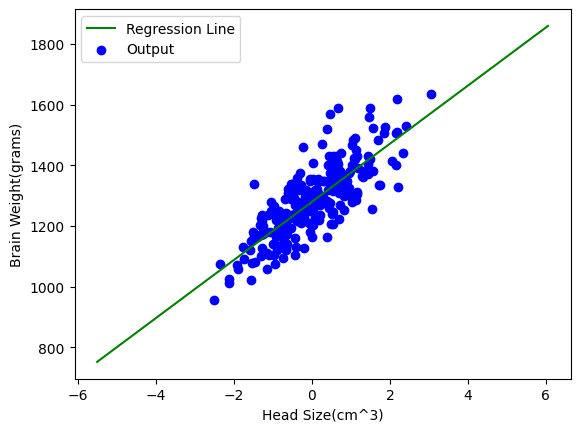

In [78]:
max_x=np.max(X)+3
min_x=np.min(X)-3

# Find the value of x ad y
x=np.linspace(min_x,max_x,1000)
y=w*x + b

# Plotting the regression line
plt.plot(x,y,color='green',label='Regression Line')
plt.scatter(X,Y,color='blue',label='Output')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [79]:
# Find R^2

ssr=0
ssm=0
for i in range(n):
    ypre=w*X[i]+b
    ssr+=(Y[i]-ypre)**2
    ymean=np.mean(Y)
    ssm+=(Y[i]-ymean)**2
Rr2=1-ssr/ssm
print(Rr2)


0.6386177900634407


In [ ]:
# Find coff of multiple linear regression
import numpy as np
# Create dependent and independent variable
x = np.array([[1,2],[2,3],[3,5],[4,7],[5,10]])
y = np.array([3,5,7,8,11])
print(x,y)
x.shape[0]

x_c = np.c_[np.ones((x.shape[0],1)),x]
x_c
x_c.T

# Matrix to store the cofficients
b = np.linalg.inv(x_c.T.dot(x_c)).dot(x_c.T).dot(y)
print(b)

[[ 1  2]
 [ 2  3]
 [ 3  5]
 [ 4  7]
 [ 5 10]] [ 3  5  7  8 11]
[1.3        1.23333333 0.33333333]


In [81]:
# Find the cofficient with ML
from sklearn.linear_model import LinearRegression

# Train the model
model=LinearRegression()

# FIt the model or run the model for x and y
model.fit(x,y)

# 
print(model.coef_, model.intercept_)

[1.23333333 0.33333333] 1.299999999999998
